In [26]:
import pandas as pd
import numpy as np

root = '/opt/home/revoli/eva/Interformer'
normal = pd.read_csv(f'{root}/result/normal/core_timetest.round0_ensemble.csv')
inter = pd.read_csv(f'{root}/result/neg_affinity/core_timetest.round0_ensemble.csv')

normal = normal[normal['task'] == 'test']
inter = inter[inter['task'] == 'test']

print('total poses:', len(normal), ', Target n:', len(normal['Target'].unique()))
# normal.corr(numeric_only=True)['rmsd']
inter.corr(numeric_only=True)['rmsd']

total poses: 7076 , Target n: 337


Year              0.021620
pIC50             0.012130
pose_rank         0.215860
num_torsions      0.324540
energy            0.325627
rmsd              1.000000
pred_pIC50       -0.562892
pred_pose        -0.659727
pred_pIC50_var    0.407317
Name: rmsd, dtype: float64

In [55]:
# Coreset affinity evaluation
normal = pd.read_csv(f'{root}/result/normal/core_timetest.round0_ensemble.csv')
inter = pd.read_csv(f'{root}/result/neg_affinity/core_timetest.round0_ensemble.csv')
#
method = 'pearson'  # spearman, pearson
eval_df = inter
eval_df = eval_df[eval_df['task'] == 'core']
eval_df = eval_df[eval_df['pose_rank'] != 20]
if 'pred_pose' in eval_df:
    print("pred_pose")
    eval_df = eval_df.sort_values('pred_pose', ascending=False).groupby('Target').head(1)
else:
    eval_df = eval_df[eval_df['pose_rank'] == 0]
print(len(eval_df))
eval_df.corr(method, numeric_only=True)['pIC50']
# eval_df

pred_pose
278


Year             -0.081363
pIC50             1.000000
pose_rank        -0.051696
num_torsions      0.276116
energy           -0.460430
rmsd             -0.037818
pred_pIC50        0.810910
pred_pose         0.070377
pred_pIC50_var   -0.003715
Name: pIC50, dtype: float64

In [22]:
inter.describe()

,Year,pIC50,pose_rank,num_torsions,energy,rmsd,pred_pIC50,pred_pose,pred_pIC50_var
count,7076.000000,7076.000000,7076.000000,7076.000000,7076.000000,7076.000000,7076.000000,7.076000e+03,7076.000000
mean,2018.997032,6.431726,9.998587,8.466083,-611.086866,5.962815,3.217741,2.606670e-01,4.339007
std,0.054400,1.815302,6.054989,8.872866,493.664044,3.770998,4.076221,3.503459e-01,8.647811
min,2018.000000,0.660000,0.000000,0.000000,-4255.452290,0.000000,-16.656250,1.220578e-07,0.001887
25%,2019.000000,5.070000,5.000000,4.000000,-784.176458,2.825680,2.071247,1.239575e-03,0.363447
50%,2019.000000,6.390000,10.000000,5.000000,-537.966564,5.731885,3.988037,4.907109e-02,1.052302
75%,2019.000000,7.770000,15.000000,9.000000,-377.707997,8.736455,5.682617,4.697509e-01,3.883250
max,2019.000000,11.300000,20.000000,48.000000,8564.997692,19.350900,10.589844,9.999878e-01,128.879700


In [23]:
# eval
bins = np.linspace(0, 10., 21, endpoint=1)

data = []
for i in range(len(bins) - 1):
    max_rmsd = bins[i + 1] if bins[i + 1] != 10 else 20  # the last one should be 9.5-20
    df = inter
    sub_df = df[(df['rmsd'] < max_rmsd) & (df['rmsd'] > bins[i])]
    df = normal
    sub_df_normal = df[(df['rmsd'] < max_rmsd) & (df['rmsd'] > bins[i])]
    #
    avg_a, avg_normal, avg_pose_rank, avg_pose_score = sub_df['pred_pIC50'].mean(), sub_df_normal['pred_pIC50'].mean(), sub_df['pose_rank'].mean(), sub_df['pred_pose'].mean()
    data.append([bins[i + 1], avg_a, avg_normal, avg_pose_rank, avg_pose_score * 10.])

df = pd.DataFrame(data, columns=['RMSD', 'Affinity', 'Affinity w/o Neg', 'PoseRank', 'PoseScore'])
df

,RMSD,Affinity,Affinity w/o Neg,PoseRank,PoseScore
0,0.5,6.198716,6.135101,4.747475,9.339553
1,1.0,6.423501,6.491358,4.914286,8.824632
2,1.5,6.087814,6.429441,5.021008,7.739379
3,2.0,5.977360,6.439877,6.054237,6.404862
4,2.5,5.750284,6.580239,5.798165,4.807197
5,3.0,5.227107,6.437476,7.015337,3.679718
6,3.5,4.892929,6.363250,7.383871,2.966219
7,4.0,4.793454,6.626769,7.996960,2.134965
8,4.5,4.369401,6.190815,8.292763,2.158953
9,5.0,3.934891,6.236661,9.237942,1.344995


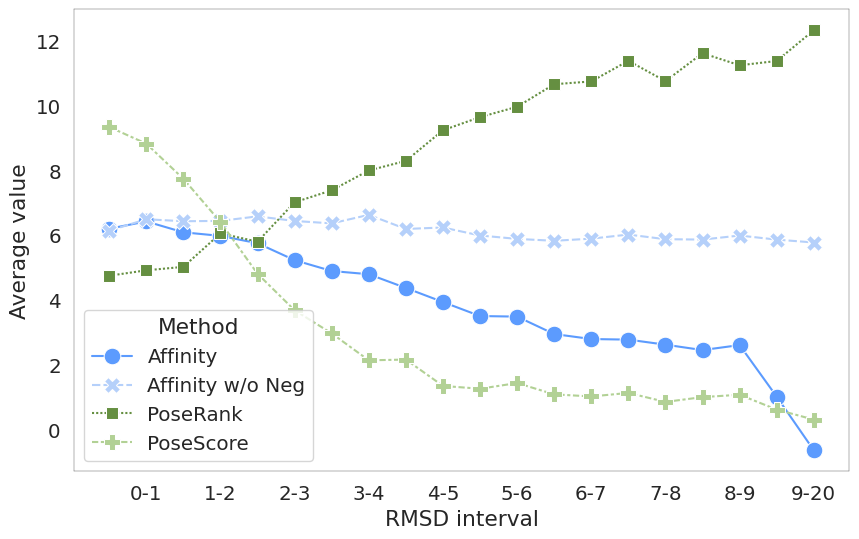

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
sns.set_style("white")
# Draw lines
# colors = ["green", "lightgreen", "gold", "orange"]
# palette = sns.color_palette(colors)
# palette = sns.color_palette("Paired")[:4]
palette = ['#5C9BFE', '#B5D0FA', '#658F41', '#B2D195']
#

dashes_style = {'Affinity': "", 'Affinity w/o Neg': (3, 3), 'PoseRank': (2, 2), 'PoseScore': (5, 3)}
fig = plt.figure(figsize=(10, 6))
data_long = df.melt(id_vars="RMSD", var_name="Method", value_name="Average value")
sns.lineplot(data=data_long, x="RMSD", y='Average value', hue="Method", style="Method", markers=True, palette=palette, markersize=12) # dashes=dashes_style
# sns.despine()
# 获取当前的 x 轴刻度位置和标签
bins = np.linspace(0, 10, 11)[1:]
xticks = []
for x in bins:
    if x == 10:
        xticks.append(f'9-20')
    else:
        xticks.append(f'{int(x-1)}-{int(x)}')
ax = plt.gca()
plt.xticks(bins)
ax.set_xticklabels(xticks)
plt.xlabel('RMSD interval')

for spine in ax.spines.values():
    spine.set_linewidth(0.25)  # 设置边框线条宽度为2
# output
fig.savefig('figures/4a.svg')
#
plt.show()